<a href="https://colab.research.google.com/github/diaputr/pcvk/blob/main/Week11_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 6**

Agus Prayogi (05 | 2141720025)

Diah Putri Nofianti (12 | 2141720054)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/Shareddrives/Kita/Kuliah/SMT5/PCVK/Week11'

Mounted at /content/drive


In [55]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## Template Matching

Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

Dengan library OpenCv:

`cv.matchTemplate()` dengan parameter:

- **Image** => citra input
- **templ** => template yang dicari, tidak boleh lebih besar dari ukuran citra input
- **method** => metode dari template matching



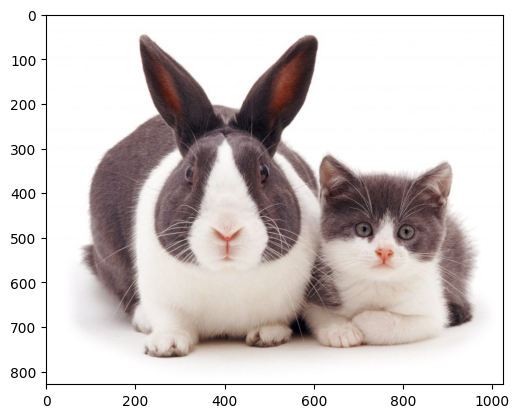

In [61]:
objectPath = f'{path}/Object Detection'

imgGray = cv.imread(f'{objectPath}/cats_and_bunnies.jpg', cv.IMREAD_GRAYSCALE)
assert imgGray is not None, "File tidak ditemukan, pada lokasi os.path.exists()"

template = cv.imread(f'{objectPath}/cat2_templatejpg.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "File tidak ditemukan, pada lokasi os.path.exists()"
# template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
w, h = template.shape[::-1]

In [58]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

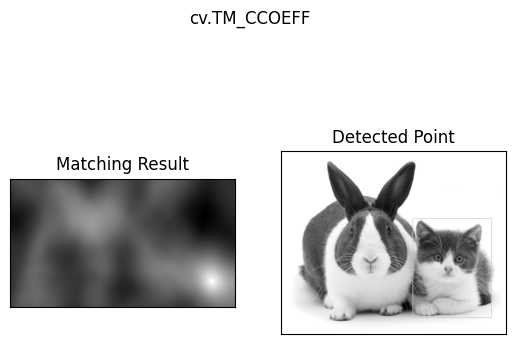

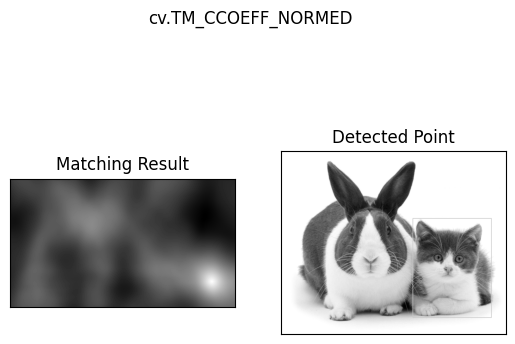

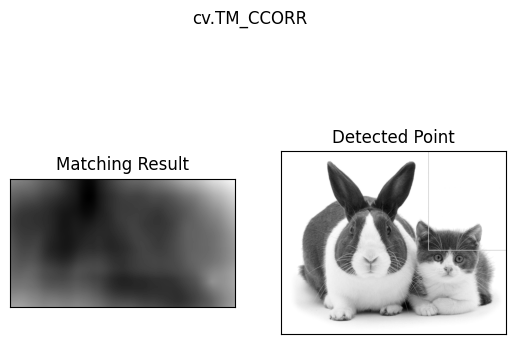

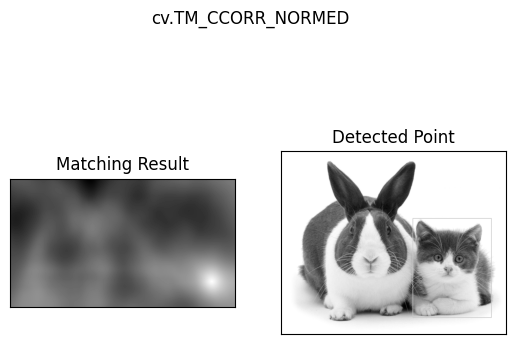

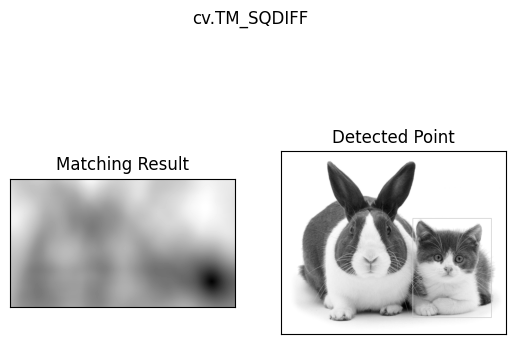

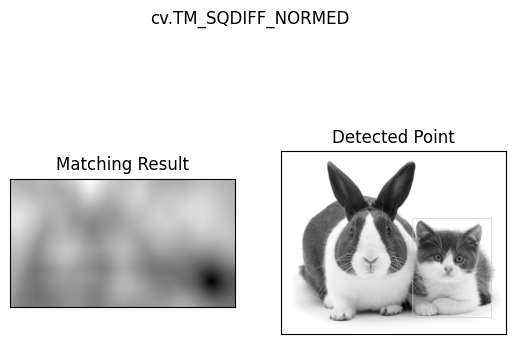

In [64]:
for meth in methods:
    img = imgGray.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 200, 2)
    plt.subplot(121),plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

## Tanpa Library
Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut: